# Heart Disease Prediction Python (Machine Learning)

## Background
Heart Disease is the leading cause of death in our country. 1 in 5 deaths are from heart disease and currently 20 million U.S. adults are diagnosed with heart disease. A major issue is the misdiagnosis of heart disease which can range anywhere from 20% to 70% of patients depending where they're diagnosed at. Misdiagnosis of heart disease can result in the lack of treatment or improper treatment so it's essential to be more accurate with the diagnosis. 

## Goal
The goal is to build a random forest model to help hospitals better predict whether a patient has heart disease or not. 

## Dataset Summary
The dataset contains medical test and heart disease diagnosis results of 1026 patients from the Cleveland Clinical Foundation. There are 13 features in the dataset and the target variable is 0/1 for whether the patient has heart disease or not.

### Data Dictionary
1. age: The person's age in years
2. sex: The person's sex (1 = male, 0 = female)
3. cp: The chest pain experienced (0= typical angina, 1= atypical angina, 2= non-anginal pain, 3= asymptomatic)
4. trestbps: The person's resting blood pressure (mm Hg on admission to the hospital)
5. chol: The person's cholesterol measurement in mg/dl
6. fbs: The person's fasting blood sugar (> 120 mg/dl, 1 = true; 0 = false)
7. restecg: Resting electrocardiographic measurement (0 = normal, 1 = having ST-T wave abnormality, 2 = left ventricular hypertrophy
8. thalach: The person's maximum heart rate achieved
9. exang: Exercise induced angina (1 = yes; 0 = no)
10. oldpeak: ST depression induced by exercise relative to rest 
11. slope: The slope of the peak exercise ST segment (0= upsloping, 1= flat,2= downsloping)
12. ca: The number of major vessels (0-3)
13. thal: A blood disorder called thalassemia (0,1 = normal; 2 = fixed defect; 3 = reversible defect)
14. target: Heart disease (1=yes, 0=No)

## Python Code

### Import Libraries

In [260]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Open Heart Disease Dataset CSV File

In [261]:
df= pd.read_csv(r"C:\Users\mapze\OneDrive\Documents\Python Scripts\heart.csv")

In [262]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


### Change Column Names and Data Types

In [263]:
df.columns = ['age', 'sex', 'chest_pain_type', 'resting_blood_pressure', 'cholesterol', 'fasting_blood_sugar', 'rest_ecg', 'max_heart_rate',
       'exercise_induced_angina', 'st_depression', 'st_slope', 'number_major_vessels', 'thalassemia', 'target']

In [264]:
pd.options.mode.chained_assignment = None  
df['sex'][df['sex'] == 0] = 'female'
df['sex'][df['sex'] == 1] = 'male'

df['chest_pain_type'][df['chest_pain_type'] == 0] = 'typical angina'
df['chest_pain_type'][df['chest_pain_type'] == 1] = 'atypical angina'
df['chest_pain_type'][df['chest_pain_type'] == 2] = 'non-anginal pain'
df['chest_pain_type'][df['chest_pain_type'] == 3] = 'asymptomatic'

df['fasting_blood_sugar'][df['fasting_blood_sugar'] == 0] = '< 120mg/ml'
df['fasting_blood_sugar'][df['fasting_blood_sugar'] == 1] = '> 120mg/ml'

df['rest_ecg'][df['rest_ecg'] == 0] = 'normal'
df['rest_ecg'][df['rest_ecg'] == 1] = 'ST-T wave abnormality'
df['rest_ecg'][df['rest_ecg'] == 2] = 'left ventricular hypertrophy'

df['exercise_induced_angina'][df['exercise_induced_angina'] == 0] = 'no'
df['exercise_induced_angina'][df['exercise_induced_angina'] == 1] = 'yes'

df['st_slope'][df['st_slope'] == 0] = 'upsloping'
df['st_slope'][df['st_slope'] == 1] = 'flat'
df['st_slope'][df['st_slope'] == 2] = 'downsloping'

df['thalassemia'][df['thalassemia'] == 0] = 'normal'
df['thalassemia'][df['thalassemia'] == 1] = 'normal'
df['thalassemia'][df['thalassemia'] == 2] = 'fixed defect'
df['thalassemia'][df['thalassemia'] == 3] = 'reversible defect'

In [265]:
df['sex'] = df['sex'].astype('object')
df['chest_pain_type'] = df['chest_pain_type'].astype('object')
df['fasting_blood_sugar'] = df['fasting_blood_sugar'].astype('object')
df['rest_ecg'] = df['rest_ecg'].astype('object')
df['exercise_induced_angina'] = df['exercise_induced_angina'].astype('object')
df['st_slope'] = df['st_slope'].astype('object')
df['thalassemia'] = df['thalassemia'].astype('object')

In [266]:
df

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate,exercise_induced_angina,st_depression,st_slope,number_major_vessels,thalassemia,target
0,52,male,typical angina,125,212,< 120mg/ml,ST-T wave abnormality,168,no,1.0,downsloping,2,reversible defect,0
1,53,male,typical angina,140,203,> 120mg/ml,normal,155,yes,3.1,upsloping,0,reversible defect,0
2,70,male,typical angina,145,174,< 120mg/ml,ST-T wave abnormality,125,yes,2.6,upsloping,0,reversible defect,0
3,61,male,typical angina,148,203,< 120mg/ml,ST-T wave abnormality,161,no,0.0,downsloping,1,reversible defect,0
4,62,female,typical angina,138,294,> 120mg/ml,ST-T wave abnormality,106,no,1.9,flat,3,fixed defect,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,male,atypical angina,140,221,< 120mg/ml,ST-T wave abnormality,164,yes,0.0,downsloping,0,fixed defect,1
1021,60,male,typical angina,125,258,< 120mg/ml,normal,141,yes,2.8,flat,1,reversible defect,0
1022,47,male,typical angina,110,275,< 120mg/ml,normal,118,yes,1.0,flat,1,fixed defect,0
1023,50,female,typical angina,110,254,< 120mg/ml,normal,159,no,0.0,downsloping,0,fixed defect,1


## Exploratory Analysis
Countplot of target variable shows the dataset is balanced 

1    526
0    499
Name: target, dtype: int64


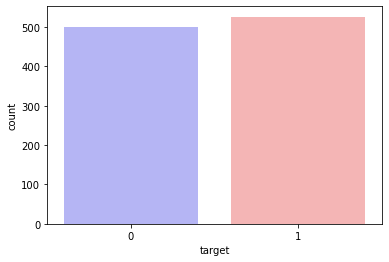

Percentage of Patients Without Heart Disease:48.68%
Percentage of Patients Have Heart Disease: 51.32%


In [267]:
print(df.target.value_counts())
sns.countplot(x="target", data=df, palette="bwr")
plt.show()
countNoDisease = len(df[df.target == 0])
countHaveDisease = len(df[df.target == 1])
print("Percentage of Patients Without Heart Disease:{:.2f}%".format((countNoDisease / (len(df.target))*100)))
print("Percentage of Patients Have Heart Disease: {:.2f}%".format((countHaveDisease / (len(df.target))*100)))


### Heart Disease by Sex
Bar chart shows that females were more likely to have heart disease than men in the dataset.

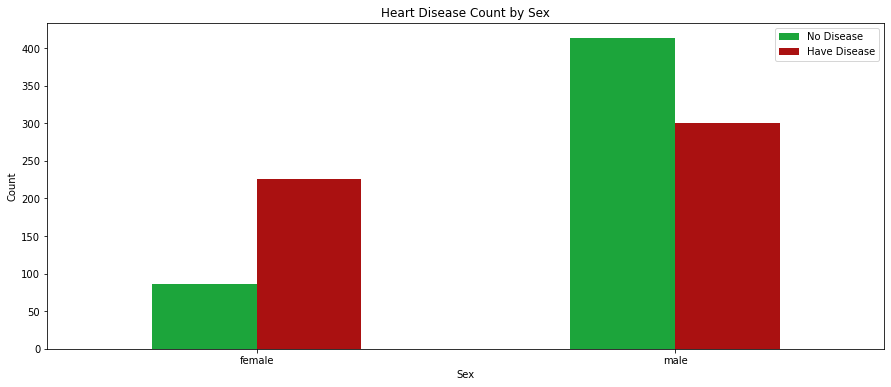

In [268]:
pd.crosstab(df.sex,df.target).plot(kind="bar",figsize=(15,6),color=['#1CA53B','#AA1111' ])
plt.title('Heart Disease Count by Sex')
plt.xlabel('Sex')
plt.xticks(rotation=0)
plt.legend(["No Disease", "Have Disease"])
plt.ylabel('Count')
plt.show()

### Age and Max Heart Rate
Age doesn't seem to be as much of a factor as maximum heart rate as shown in the chart. Younger people with higher max heart rates had heart disease more than older people with lower heart rates for the most part. 

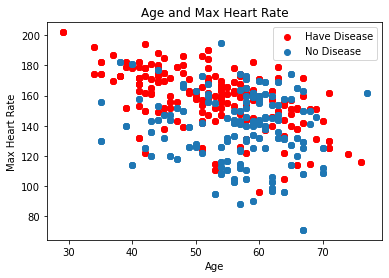

In [269]:
plt.scatter(x=df.age[df.target==1], y=df.max_heart_rate[(df.target==1)], c="red")
plt.scatter(x=df.age[df.target==0], y=df.max_heart_rate[(df.target==0)])
plt.legend(["Have Disease", "No Disease"])
plt.title('Age and Max Heart Rate')
plt.xlabel("Age")
plt.ylabel("Max Heart Rate")
plt.show()

### Fasting Blood Sugar
Higher blood sugars have been correlated to heart disease in studies but this chart shows that patients with lower blood sugar actually were more likely to have heart disease.

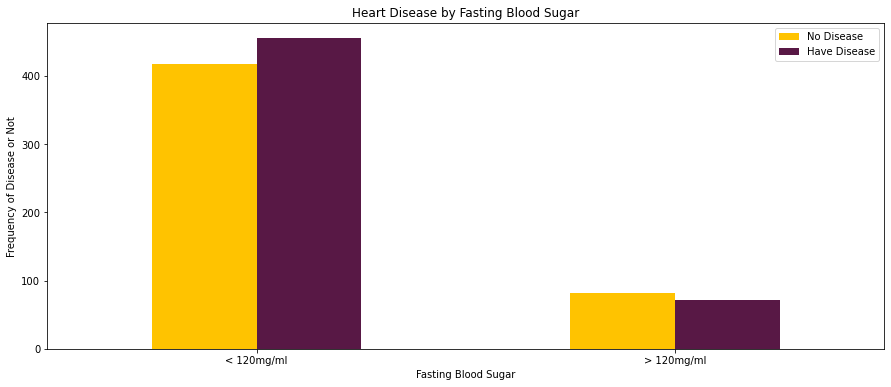

In [270]:
pd.crosstab(df.fasting_blood_sugar,df.target).plot(kind="bar",figsize=(15,6),color=['#FFC300','#581845'])
plt.title('Heart Disease by Fasting Blood Sugar')
plt.xlabel('Fasting Blood Sugar')
plt.xticks(rotation = 0)
plt.legend(["No Disease", "Have Disease"])
plt.ylabel('Frequency of Disease or Not')
plt.show()

### Chest Pain Type
Patients with non-anginal pain and atypical angina were most likely to have heart disease. Patients with typical angina were much less likely to have heart disease. 

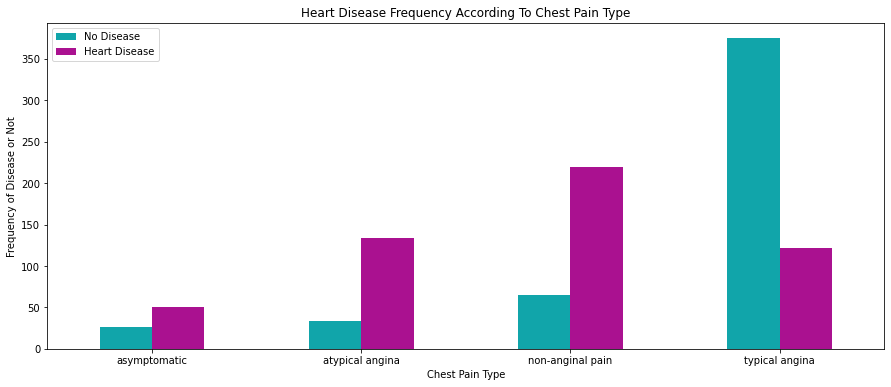

In [271]:
pd.crosstab(df.chest_pain_type,df.target).plot(kind="bar",figsize=(15,6),color=['#11A5AA','#AA1190' ])
plt.title('Heart Disease Frequency According To Chest Pain Type')
plt.xlabel('Chest Pain Type')
plt.xticks(rotation = 0)
plt.ylabel('Frequency of Disease or Not')
plt.legend(["No Disease","Heart Disease"])
plt.show()

### Make dummy variables for categorical features

In [272]:
df = pd.get_dummies(df, drop_first=True)


In [273]:
df

,age,resting_blood_pressure,cholesterol,max_heart_rate,st_depression,number_major_vessels,target,sex_male,chest_pain_type_atypical angina,chest_pain_type_non-anginal pain,chest_pain_type_typical angina,fasting_blood_sugar_> 120mg/ml,rest_ecg_left ventricular hypertrophy,rest_ecg_normal,exercise_induced_angina_yes,st_slope_flat,st_slope_upsloping,thalassemia_normal,thalassemia_reversible defect
0,52,125,212,168,1.0,2,0,1,0,0,1,0,0,0,0,0,0,0,1
1,53,140,203,155,3.1,0,0,1,0,0,1,1,0,1,1,0,1,0,1
2,70,145,174,125,2.6,0,0,1,0,0,1,0,0,0,1,0,1,0,1
3,61,148,203,161,0.0,1,0,1,0,0,1,0,0,0,0,0,0,0,1
4,62,138,294,106,1.9,3,0,0,0,0,1,1,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,140,221,164,0.0,0,1,1,1,0,0,0,0,0,1,0,0,0,0
1021,60,125,258,141,2.8,1,0,1,0,0,1,0,0,1,1,1,0,0,1
1022,47,110,275,118,1.0,1,0,1,0,0,1,0,0,1,1,1,0,0,0
1023,50,110,254,159,0.0,0,1,0,0,0,1,0,0,1,0,0,0,0,0


## Making the Random Forest Model

Split the data for training and testing

In [274]:
y = df.target.values
X= df.drop(['target'], axis = 1)

In [275]:
X

,age,resting_blood_pressure,cholesterol,max_heart_rate,st_depression,number_major_vessels,sex_male,chest_pain_type_atypical angina,chest_pain_type_non-anginal pain,chest_pain_type_typical angina,fasting_blood_sugar_> 120mg/ml,rest_ecg_left ventricular hypertrophy,rest_ecg_normal,exercise_induced_angina_yes,st_slope_flat,st_slope_upsloping,thalassemia_normal,thalassemia_reversible defect
0,52,125,212,168,1.0,2,1,0,0,1,0,0,0,0,0,0,0,1
1,53,140,203,155,3.1,0,1,0,0,1,1,0,1,1,0,1,0,1
2,70,145,174,125,2.6,0,1,0,0,1,0,0,0,1,0,1,0,1
3,61,148,203,161,0.0,1,1,0,0,1,0,0,0,0,0,0,0,1
4,62,138,294,106,1.9,3,0,0,0,1,1,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,140,221,164,0.0,0,1,1,0,0,0,0,0,1,0,0,0,0
1021,60,125,258,141,2.8,1,1,0,0,1,0,0,1,1,1,0,0,1
1022,47,110,275,118,1.0,1,1,0,0,1,0,0,1,1,1,0,0,0
1023,50,110,254,159,0.0,0,0,0,0,1,0,0,1,0,0,0,0,0


### Split into training data and testing data

In [276]:
from sklearn.model_selection import train_test_split
'''Split data into 70% train and 30% test'''
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.7,random_state=44)
print(X_train.shape,X_test.shape)

(717, 18) (308, 18)


### Use Grid Search to find Optimal Random Forest Parameters

In [277]:
'''Use grid search to find best random forest model'''
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

max_depth=[2, 8, 16]
n_estimators = [64, 128, 256]
param_grid = dict(max_depth=max_depth, n_estimators=n_estimators)

# Build the grid search
dfrst = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth)
grid = GridSearchCV(estimator=dfrst, param_grid=param_grid, cv = 5)
grid_results = grid.fit(X_train, y_train)

# Summarize the results in a readable format
print("Best: {0}, using {1}".format(grid_results.cv_results_['mean_test_score'], grid_results.best_params_))
results_df = pd.DataFrame(grid_results.cv_results_)
print(results_df)

Best: [0.84241453 0.83404235 0.8521756  0.96369464 0.96091686 0.96508353
 0.96648213 0.96508353 0.96368493], using {'max_depth': 16, 'n_estimators': 64}
   mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       0.070019      0.009453         0.009382        0.007660   
1       0.124945      0.000187         0.009373        0.007653   
2       0.252997      0.006087         0.018745        0.006245   
3       0.074973      0.011676         0.006249        0.007653   
4       0.156212      0.009865         0.003126        0.006252   
5       0.297842      0.010453         0.018745        0.006248   
6       0.069882      0.007034         0.012506        0.006253   
7       0.146901      0.007583         0.009301        0.007596   
8       0.285763      0.006198         0.031242        0.000002   

  param_max_depth param_n_estimators                                  params  \
0               2                 64    {'max_depth': 2, 'n_estimators': 64}   
1               

The grid search shows the best Random Forest model has 64 trees with a max_depth of 16.

### Make the best Random Forest model and fit it to the training data

In [278]:
FinalForest=RandomForestClassifier(n_estimators=64,max_depth=16,max_features='sqrt')

#Train Model
FinalForest.fit(X_train,y_train)

RandomForestClassifier(max_depth=16, max_features='sqrt', n_estimators=64)

In [279]:
#Predictions on test set
y_pred = FinalForest.predict(X_test)

## Model Evaluation

In [280]:
#Get Accuracy and AUC of Random Forest on the Test Set
from sklearn import metrics

print("Accuracy:",metrics.accuracy_score(y_test,y_pred))

print("AUC:",metrics.roc_auc_score(y_test, y_pred))

Accuracy: 0.9805194805194806
AUC: 0.980506329113924


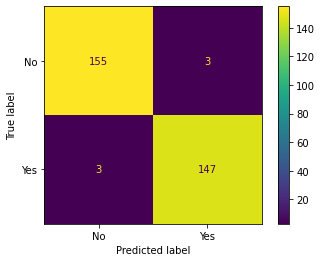

In [281]:
#Confusion Matrix
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cnf_matrix, display_labels = ['No', 'Yes'])


cm_display.plot()

### Get Feature Importances for Random Forest

In [282]:
importances= FinalForest.feature_importances_

columns=X.columns
i=0

while i < len(columns):
    print("The importance of {} is {}%".format(columns[i],round(importances[i]*100,2)))
    i += 1

The importance of age is 9.26%
The importance of resting_blood_pressure is 6.68%
The importance of cholesterol is 8.52%
The importance of max_heart_rate is 10.34%
The importance of st_depression is 9.61%
The importance of number_major_vessels is 9.86%
The importance of sex_male is 2.79%
The importance of chest_pain_type_atypical angina is 1.37%
The importance of chest_pain_type_non-anginal pain is 3.22%
The importance of chest_pain_type_typical angina is 11.68%
The importance of fasting_blood_sugar_> 120mg/ml is 0.96%
The importance of rest_ecg_left ventricular hypertrophy is 0.11%
The importance of rest_ecg_normal is 2.0%
The importance of exercise_induced_angina_yes is 7.39%
The importance of st_slope_flat is 3.98%
The importance of st_slope_upsloping is 0.51%
The importance of thalassemia_normal is 0.6%
The importance of thalassemia_reversible defect is 11.11%


### Permutation Importance

In [283]:
from sklearn.inspection import permutation_importance


In [284]:
import eli5

In [285]:
from eli5.sklearn import PermutationImportance


In [286]:
perm = PermutationImportance(FinalForest, random_state=1).fit(X_test, y_test)
eli5.show_weights(perm, feature_names = X_test.columns.tolist())

Weight,Feature
0.0649 ± 0.0425,number_major_vessels
0.0500 ± 0.0271,thalassemia_reversible defect
0.0390 ± 0.0082,chest_pain_type_typical angina
0.0292 ± 0.0229,st_depression
0.0240 ± 0.0088,exercise_induced_angina_yes
0.0188 ± 0.0112,cholesterol
0.0175 ± 0.0052,st_slope_flat
0.0162 ± 0.0130,age
0.0156 ± 0.0086,sex_male
0.0136 ± 0.0049,max_heart_rate


In [287]:
import shap

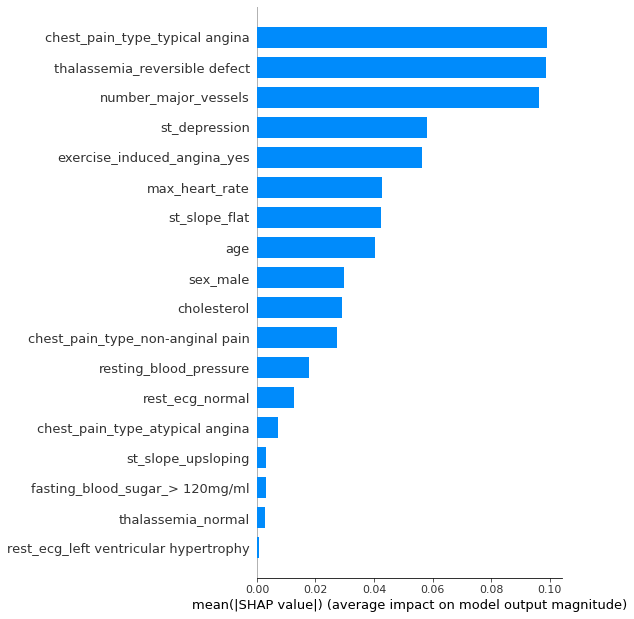

In [288]:
explainer = shap.TreeExplainer(FinalForest)
shap_values = explainer.shap_values(X_test)

shap.summary_plot(shap_values[1], X_test, plot_type="bar")

From these two graphs, we can see the most important features in the model are thalassemia, chest pain type, number of major blood vessels, exercise induced angina, max heart rate, and st_depression. 

## Conclusion

I have built a very accurate Random Forest model to predict whether patients have heart disease or not. I conducted exploratory analysis, made the model, and evaluated the model in Python. My model did not necessarily align with some of the common factors contributing to heart disease. Factors like cholesterol and blood sugar were not very important features in my model even though those are two of the most common things studies have shown contribute to heart disease. I learned a lot in my analysis and researching what these features are and their correlation to heart disease. 